In [102]:
import pandas as pd
import seaborn as sns
import numpy  as np
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score
import lightgbm as lgb
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score


In [2]:
data=pd.read_csv("C:\\Users\\NoteBooK\Desktop\graduation project data\diabetes_012_health_indicators_BRFSS2015.csv")

In [3]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
data .columns


Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [9]:
data["Diabetes_012"].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

In [10]:
data["Diabetes_012"].value_counts(normalize=1)

0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: Diabetes_012, dtype: float64

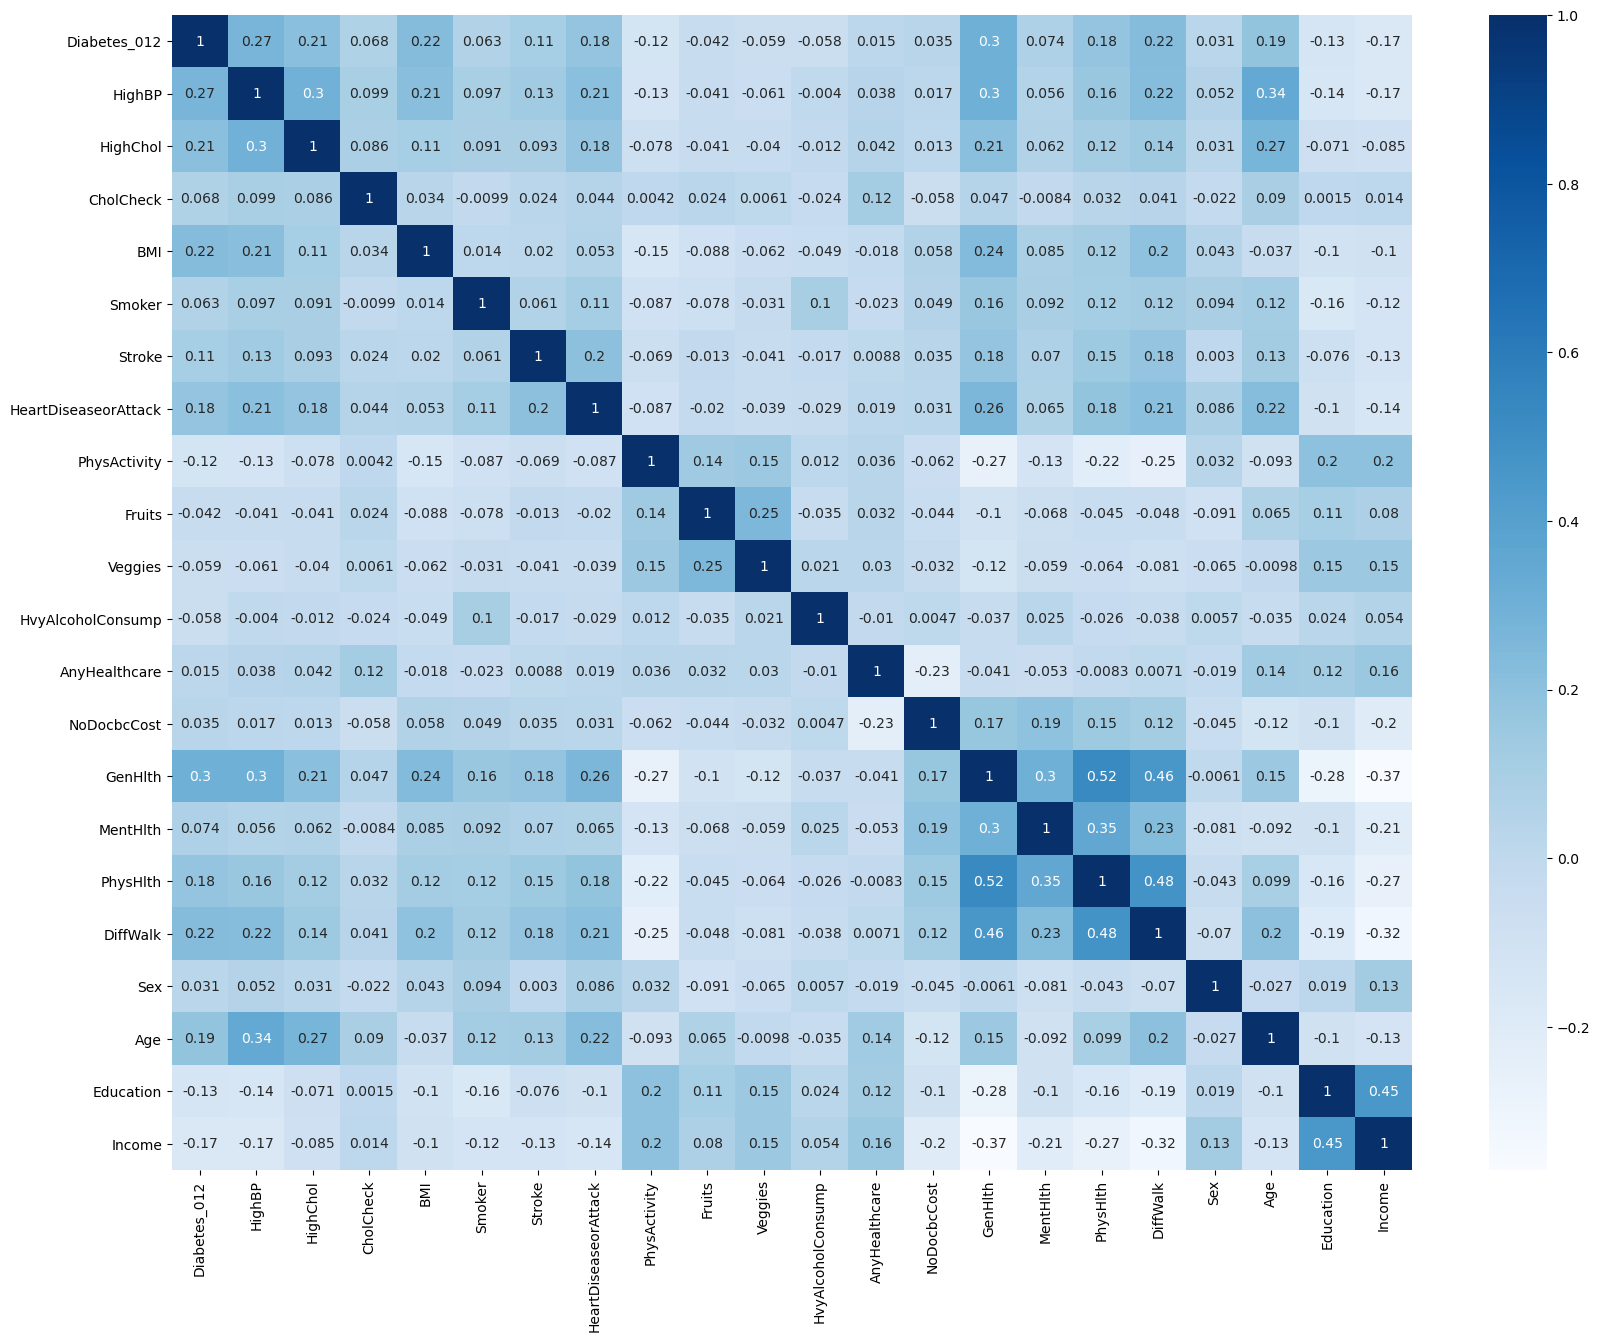

In [11]:
plt.figure(figsize=(20,15))
p=sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

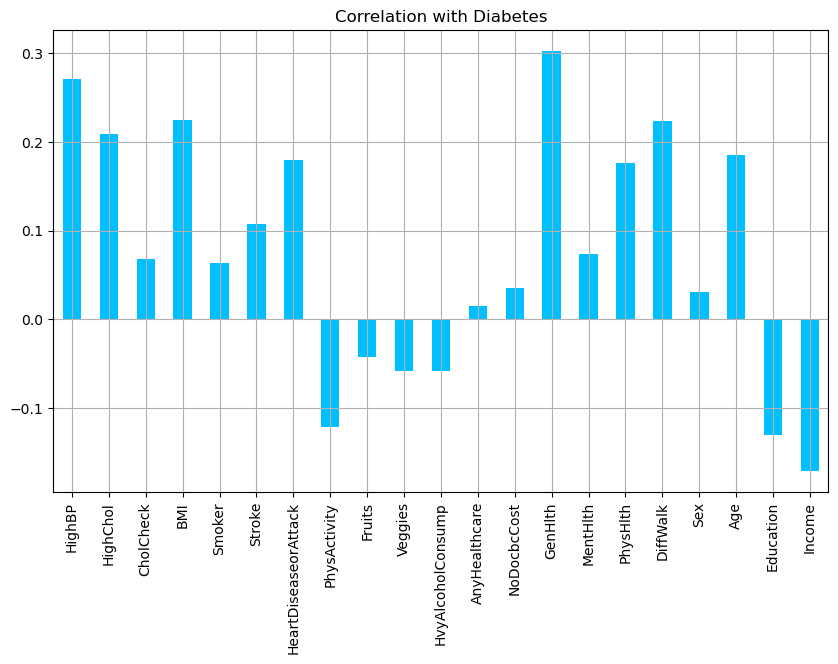

In [18]:
data.drop('Diabetes_012', axis=1).corrwith(data.Diabetes_012).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes",color="deepskyblue")
plt.show();

In [22]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

## droping less effictive features

In [4]:
data.drop(columns=['Fruits', 'Veggies','AnyHealthcare','NoDocbcCost',],axis =1,inplace =True)



# dropping irrelavant features

In [5]:
data.drop(columns=['Education', 'Income'],axis =1,inplace =True)

In [28]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0


In [31]:
dm_skew = data[['Age','BMI','PhysHlth',"MentHlth"]]
skew = pd.DataFrame(dm_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.359903,False
BMI,2.122004,True
PhysHlth,2.207395,True
MentHlth,2.721148,True


In [36]:
skew.style.background_gradient(cmap='Blues')


,skew,too_skewed
Age,-0.359903,False
BMI,2.122004,True
PhysHlth,2.207395,True
MentHlth,2.721148,True


In [38]:
data.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

In [6]:
data_preprocessed=data.copy()


In [7]:
ST=StandardScaler()

data_preprocessed[['BMI']] = ST.fit_transform(data_preprocessed[['BMI']])
data_preprocessed[['Age']] = ST.fit_transform(data_preprocessed[['Age']])
data_preprocessed[['PhysHlth']] = ST.fit_transform(data_preprocessed[['PhysHlth']])
data_preprocessed[['MentHlth']] = ST.fit_transform(data_preprocessed[['MentHlth']])





In [8]:
QT=QuantileTransformer(n_quantiles=500,output_distribution='normal')

data_preprocessed[['BMI']] = QT.fit_transform(data_preprocessed[['BMI']])
data_preprocessed[['Age']] = QT.fit_transform(data_preprocessed[['Age']])
data_preprocessed[['PhysHlth']] = QT.fit_transform(data_preprocessed[['PhysHlth']])
data_preprocessed[['MentHlth']] = QT.fit_transform(data_preprocessed[['MentHlth']])




In [197]:
dm_skew = data_preprocessed[['Age','BMI','PhysHlth',"MentHlth"]]
skew = pd.DataFrame(dm_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,0.895621,True
BMI,0.025164,False
PhysHlth,0.894804,True
MentHlth,1.109884,True


In [10]:
cat_features=['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',  'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth',  'DiffWalk', 'Sex']
lb = LabelEncoder()
for col in cat_features:
    data_preprocessed[col]=lb.fit_transform( data_preprocessed[col])

In [198]:
data_preprocessed.duplicated().sum()

87577

In [199]:
data_preprocessed[data_preprocessed.duplicated()]["Diabetes_012"].value_counts()

0.0    83563
2.0     3895
1.0      119
Name: Diabetes_012, dtype: int64

In [200]:
data_preprocessed.drop_duplicates()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,1.634259,1.0,0.0,0.0,0.0,0.0,5.0,1.483748,1.230695,1.0,0.0,0.212569
1,0.0,0.0,0.0,0.0,-0.477134,1.0,0.0,0.0,1.0,0.0,3.0,-5.199338,-5.199338,0.0,0.0,-0.405145
2,0.0,1.0,1.0,1.0,0.158900,0.0,0.0,0.0,0.0,0.0,5.0,5.199338,5.199338,1.0,0.0,0.212569
3,0.0,1.0,0.0,1.0,-0.042711,0.0,0.0,0.0,1.0,0.0,2.0,-5.199338,-5.199338,0.0,0.0,0.944940
4,0.0,1.0,1.0,1.0,-0.691935,0.0,0.0,0.0,1.0,0.0,2.0,0.818931,-5.199338,0.0,0.0,0.944940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253673,0.0,1.0,0.0,1.0,1.798207,0.0,0.0,0.0,1.0,0.0,3.0,1.303557,0.767329,0.0,1.0,-1.460005
253675,0.0,1.0,1.0,1.0,2.013252,0.0,0.0,0.0,0.0,0.0,3.0,-5.199338,0.854577,0.0,1.0,-0.902609
253676,2.0,1.0,1.0,1.0,-2.364877,0.0,0.0,0.0,0.0,0.0,4.0,-5.199338,-5.199338,1.0,0.0,0.944940
253678,0.0,1.0,0.0,1.0,-0.937119,0.0,0.0,0.0,0.0,0.0,3.0,-5.199338,-5.199338,0.0,1.0,-0.405145


In [203]:
data_preprocessed["Diabetes_012"].value_counts(normalize=True)

0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: Diabetes_012, dtype: float64

# Resampling for unbalanced data
## we  will try two ways over sampling and under sampling


In [11]:
def train_evaluate_model(predictions,y_test):
    #fit the model instance 
     # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions,average='micro')
    
    
    precision = precision_score(y_test, predictions,average='micro')
    recall = recall_score(y_test, predictions,average='micro')
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    #auc = roc_auc_score(y_test, predictions,multi_class='ovr')

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [12]:
X=data_preprocessed.drop(columns=["Diabetes_012"],axis =1)
y=data_preprocessed["Diabetes_012"]

In [13]:
OverS=RandomOverSampler(random_state=42, sampling_strategy='not majority')
X_over,y_over=OverS.fit_resample(X,y)

In [14]:
X_over_train,X_over_test,y_over_train,y_over_test=train_test_split(X_over,y_over,test_size=0.2,random_state=42)


In [215]:
X_over

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,1.0,1.0,1.0,1.634259,1.0,0.0,0.0,0.0,0.0,5.0,1.483748,1.230695,1.0,0.0,0.212569
1,0.0,0.0,0.0,-0.477134,1.0,0.0,0.0,1.0,0.0,3.0,-5.199338,-5.199338,0.0,0.0,-0.405145
2,1.0,1.0,1.0,0.158900,0.0,0.0,0.0,0.0,0.0,5.0,5.199338,5.199338,1.0,0.0,0.212569
3,1.0,0.0,1.0,-0.042711,0.0,0.0,0.0,1.0,0.0,2.0,-5.199338,-5.199338,0.0,0.0,0.944940
4,1.0,1.0,1.0,-0.691935,0.0,0.0,0.0,1.0,0.0,2.0,0.818931,-5.199338,0.0,0.0,0.944940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641104,1.0,1.0,1.0,0.314018,1.0,0.0,0.0,1.0,0.0,2.0,-5.199338,-5.199338,0.0,1.0,1.303557
641105,1.0,0.0,1.0,-1.994548,1.0,1.0,0.0,0.0,0.0,3.0,-5.199338,-5.199338,0.0,0.0,5.199338
641106,1.0,0.0,1.0,0.895085,0.0,0.0,0.0,1.0,0.0,4.0,0.993141,0.854577,0.0,1.0,0.212569
641107,1.0,0.0,1.0,1.018128,1.0,0.0,0.0,0.0,0.0,4.0,-5.199338,1.403994,0.0,0.0,0.212569


In [15]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_over_train, y_over_train)
DecisionTree_over_predicted=dt.predict(X_over_test)


In [16]:
results = train_evaluate_model(DecisionTree_over_predicted,y_over_test)
results.index = ['Decision tree - over sampling']
results.style.background_gradient(cmap = sns.color_palette("Blues", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
Decision tree - over sampling,0.892865,0.892865,0.892865,0.892865,0.892851


In [17]:
rfc = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}

# Create a Grid Search CV object
RF_grid_search_ = GridSearchCV(rfc, param_grid=param_grid, cv=3, n_jobs=-1,verbose=3)
RF_grid_search_.fit(X_over_train,y_over_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [18]:
RF_grid_search_.best_params_

{'max_depth': 15, 'n_estimators': 200}

In [19]:
RF_grid_search_.best_estimator_

RandomForestClassifier(max_depth=15, n_estimators=200)

In [21]:
RF_over_predctions=RF_grid_search_.predict(X_over_test)

In [30]:
RAndom_forst_over_score=train_evaluate_model(RF_over_predctions,y_over_test)
RAndom_forst_over_score.index = ['Random forest - over sampling']
results=results.append(RAndom_forst_over_score)


In [23]:
XGB_over=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
XGB_over.fit(X_over_train,y_over_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [31]:
XGB_over_predctions=XGB_over.predict(X_over_test)
XGB_over_score=train_evaluate_model(XGB_over_predctions,y_over_test)
XGB_over_score.index=["XGB -over sampling"]
results=results.append(XGB_over_score)

In [45]:

class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_over_train), y=y_over_train)

# Define LightGBM dataset
#train_data = lgb.Dataset(X_train, label=y_train)

# Define hyperparameters for grid search
param_grid = {
    'num_leaves': [10, 20, 31, 40],
    'max_depth': [-1, 5, 10,20],
    'learning_rate': [0.01, 0.1, 0.5],
    'class_weight': [None, class_weights]
}

scorer = make_scorer(accuracy_score)

LGBM_over = lgb.LGBMClassifier()

# Perform grid search with cross-validation
LGB_over_grid_search = GridSearchCV(LGBM_over, param_grid=param_grid, scoring=scorer, cv=3,verbose=3)
LGB_over_grid_search.fit(X_over_train, y_over_train)




Fitting 3 folds for each of 96 candidates, totalling 288 fits
[CV 1/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=10;, score=0.515 total time=   3.8s
[CV 2/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=10;, score=0.515 total time=   3.7s
[CV 3/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=10;, score=0.516 total time=   3.6s
[CV 1/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=20;, score=0.525 total time=   4.3s
[CV 2/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=20;, score=0.525 total time=   4.5s
[CV 3/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=20;, score=0.525 total time=   5.9s
[CV 1/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=31;, score=0.531 total time=   7.6s
[CV 2/3] END class_weight=None, learning_rate=0.01, max_depth=-1, num_leaves=31;, score=0.533 total time=   5.6s
[CV 3/3] END class_weight=None, le

F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=10;, score=nan total time=   0.1s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=10;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=10;, score=nan total time=   0.1s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=20;, score=nan total time=   0.1s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=40;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=5, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=10;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=10;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=20;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=31;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=31;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=40;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=10, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=10;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=10;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=20;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=31;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=31;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=40;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.01, max_depth=20, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=10;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=10;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=20;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=40;, score=nan total time=   0.1s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=5, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=10;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=10;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=20;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=31;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=40;, score=nan total time=   0.1s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=10, num_leaves=40;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=10;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=10;, score=nan total time=   0.1s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=20;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=20;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=31;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=40;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=40;, score=nan total time=   0.1s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.1, max_depth=20, num_leaves=40;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=20;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=-1, num_leaves=40;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=10;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=20;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=20;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=31;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=40;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=5, num_leaves=40;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=10;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=20;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=20;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=31;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=40;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=10, num_leaves=40;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=10;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=10;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=20;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=20;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=20;, score=nan total time=   0.0s
[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=31;, score=nan total time=   0.0s
[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=31;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":


[CV 1/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=40;, score=nan total time=   0.0s
[CV 2/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=40;, score=nan total time=   0.0s


F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:158: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if class_weight == "balanced" or n_outputs == 1:
F:\Newfolder\lib\site-packages\sklearn\utils\class_weight.py:47: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif class_weight == "balanced":
F:\Newfolder\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
144 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "F:\Newfolder

[CV 3/3] END class_weight=[0.99969203 0.99962189 1.00068678], learning_rate=0.5, max_depth=20, num_leaves=40;, score=nan total time=   0.0s


GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'class_weight': [None,
                                          array([0.99969203, 0.99962189, 1.00068678])],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [-1, 5, 10, 20],
                         'num_leaves': [10, 20, 31, 40]},
             scoring=make_scorer(accuracy_score), verbose=3)

In [51]:
class_weights[2]=0.4

In [52]:
class_weights

array([0.2, 0.4, 0.4])

In [69]:
class_weights={
    0:0.1,
    1:0.4,
    2:0.5
}

In [53]:
LGB_over_grid_search.best_params_

{'class_weight': None, 'learning_rate': 0.5, 'max_depth': -1, 'num_leaves': 40}

In [70]:
LGB_weighted=lgb.LGBMClassifier(num_leaves=40,learning_rate=0.5,max_depth=-1,class_weight=class_weights)
LGB_weighted.fit(X_over_train, y_over_train)

LGBMClassifier(class_weight={0: 0.1, 1: 0.4, 2: 0.5}, learning_rate=0.5,
               num_leaves=40)

In [79]:
LGB_w_predicted=LGB_weighted.predict(X_over_test)

In [80]:
lgb_score=train_evaluate_model(LGB_w_predicted,y_over_test)

In [81]:
lgb_score.index=["light GBM over score2"]
results=results.append(lgb_score)

In [82]:
cm = confusion_matrix(y_over_test, LGB_w_predicted)


In [84]:
results = results.drop(index=results.index[-3:])

In [65]:
cm

array([[21889,  3972, 16827],
       [ 2359, 24463, 15854],
       [ 2288,  2087, 38483]], dtype=int64)

In [94]:
results.drop_duplicates().style.background_gradient(cmap = sns.color_palette("Blues", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
Decision tree - over sampling,0.892865,0.892865,0.892865,0.892865,0.892851
XGB -over sampling,0.532912,0.532912,0.532912,0.532912,0.532778
Random forest - over sampling,0.765415,0.765415,0.765415,0.765415,0.765390
light GBM over score,0.661626,0.661626,0.661626,0.661626,0.661304


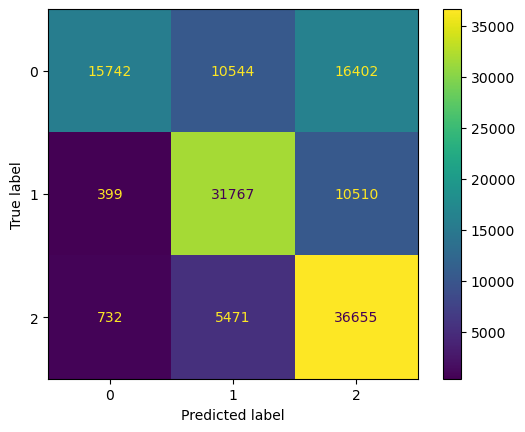

In [73]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2"])
disp.plot()
plt.show()


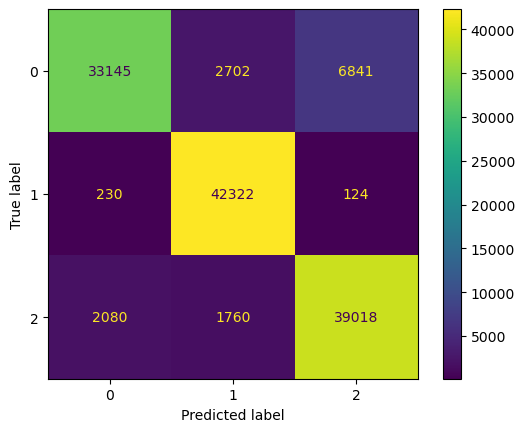

In [95]:
cm = confusion_matrix(y_over_test, DecisionTree_over_predicted)
#cmap = plt.cm.get_cmap('Blues')

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

In [98]:
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues)
plt.plot()

[]

In [106]:
print(classification_report(y_over_test,DecisionTree_over_predicted,))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85     42688
           1       0.90      0.99      0.95     42676
           2       0.85      0.91      0.88     42858

    accuracy                           0.89    128222
   macro avg       0.90      0.89      0.89    128222
weighted avg       0.90      0.89      0.89    128222



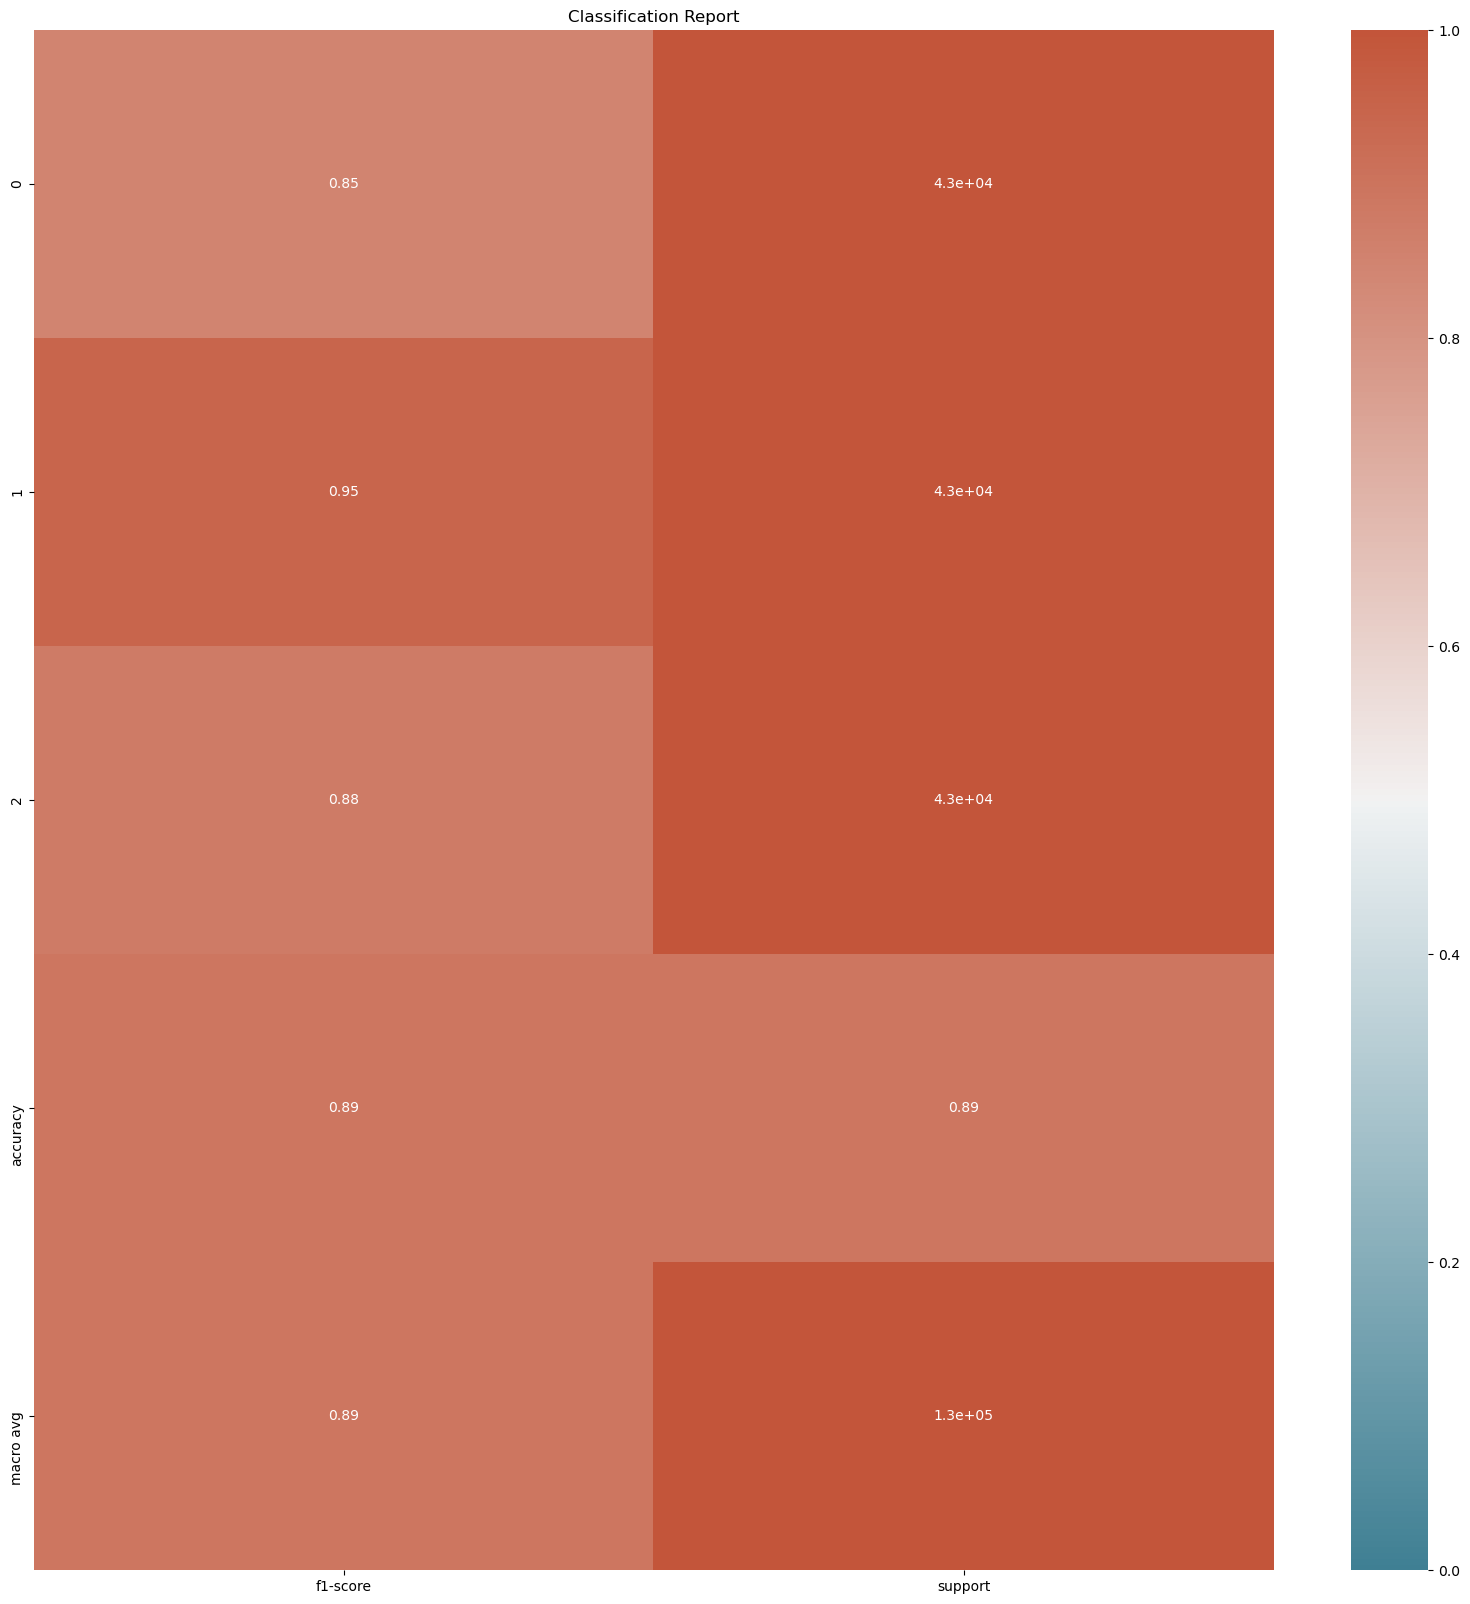

In [123]:
fig = plt.figure(figsize=(20, 20))
report =classification_report(y_over_test,DecisionTree_over_predicted, output_dict=True)
f = pd.DataFrame(report).transpose()
# Define color map
cmap = sns.diverging_palette(220, 20, as_cmap="Blues")

# Plot classification report as heatmap
sns.heatmap(f.iloc[:-1,2:], annot=True, cmap=cmap, center=0.5, vmin=0, vmax=1)
plt.title('Classification Report')
plt.show()

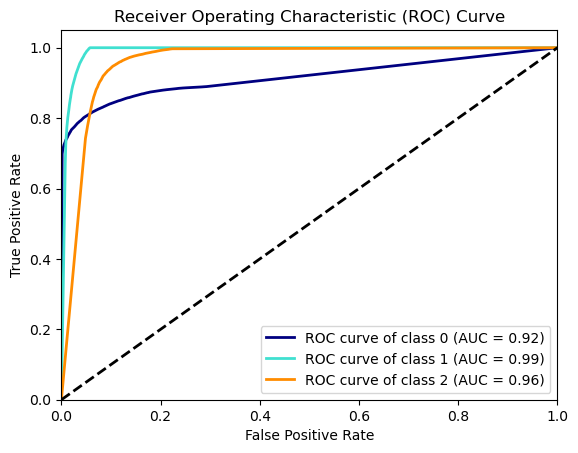

In [124]:

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Predict probabilities on test set
y_score = dt.predict_proba(X_over_test)

# Binarize the labels
y_test_bin = label_binarize(y_over_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
colors = cycle(['navy', 'turquoise', 'darkorange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

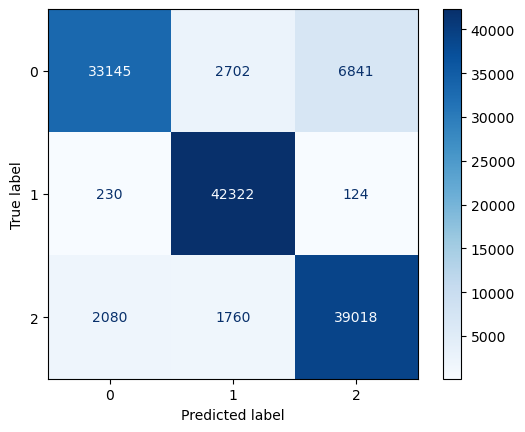

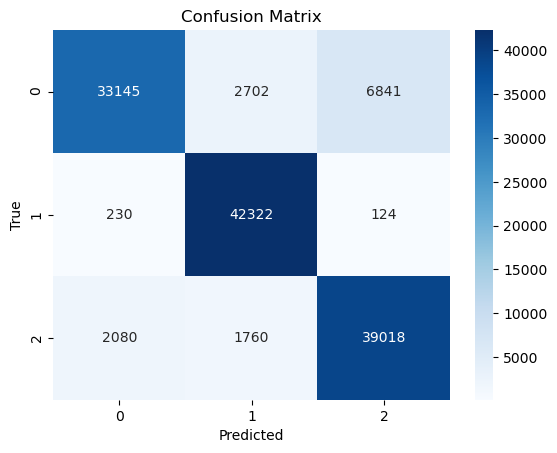

In [126]:
class_names = [0,1,2]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()
sns.heatmap(cm, annot=True, fmt='g', cmap=plt.cm.Blues, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()